In [1]:
# Import the required packages
import pandas as pd
import relativeage as ra
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Set up a factory, this will cache all data it retrieves.
fac = ra.auk.DataFactory()


In [2]:
# Basic use, get uk all time men's 100m top 10
fac.get_data(sex='M',
             event='100m',
             max_rank=10)

1,Rank,Perf,Name,DOB
0,1,9.87,Linford Christie,1960-04-02
1,2,9.91,James Dasaolu,1987-09-05
2,3,9.96,Chijindu Ujah,1994-03-05
3,4,9.96,Joel Fearon,1988-10-11
4,5,9.97,Dwain Chambers,1978-04-05
5,6,9.97,Adam Gemili,1993-10-06
6,7,9.98,Jason Gardener,1975-09-18
7,8,10.01,Richard Kilty,1989-09-02
8,9,10.03,Simeon Williamson,1986-01-16
9,10,10.04,Darren Campbell,1973-09-12


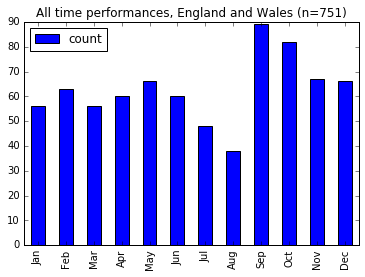

In [5]:
all_time_ew = fac.get_data(sex='M',
                           event_group=None, 
                           years=None, 
                           areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                           max_rank=50)
ra.plot_by_month(all_time_ew.DOB, "All time performances, England and Wales")

In [6]:
ra.chi_squared(all_time_ew.DOB)

0.00028674018668107751

In [4]:
groups = ra.auk.event_groups.keys()

all_time_dict = {'%s' % group: 
                 fac.get_data(sex=None,
                              event_group=group, 
                              years=None, 
                              areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                              max_rank=100).DOB for group in groups}
ra.summary_table(all_time_dict.keys(), all_time_dict.values(), 9).sort_values('Offset')

,Count,Offset,First half percentage,First to fourth quarter ratio
Throws,677,-25.34,58.05,1.97
Sprints,694,-21.50,57.20,1.74
Jumps,677,-20.86,59.38,1.72
Distance,692,-12.75,56.79,1.28


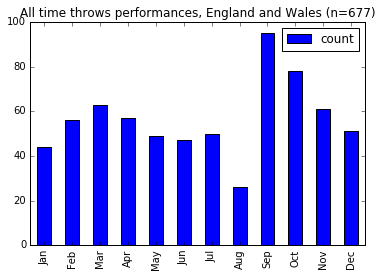

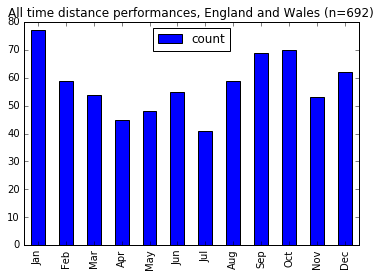

In [12]:
ra.plot_by_month(all_time_dict['Throws'], "All time throws performances, England and Wales", 
                 r"C:\temp\relative_age\athletics\all_time_ew_throws.jpg")
ra.plot_by_month(all_time_dict['Distance'], "All time distance performances, England and Wales", 
                 r"C:\temp\relative_age\athletics\all_time_ew_distance.jpg")

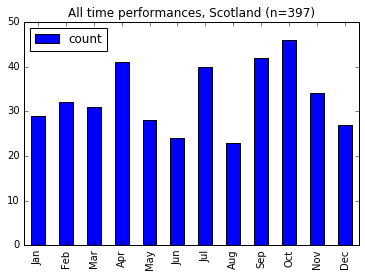

In [10]:
all_time_s = fac.get_data(sex=None,
                          event_group=None, 
                          years=None, 
                          areas=[ra.auk.Area.Scotland], 
                          max_rank=100)
ra.plot_by_month(all_time_s.DOB, "All time performances, Scotland")

In [12]:
ra.chi_squared(all_time_s.DOB)

0.052971593338463421

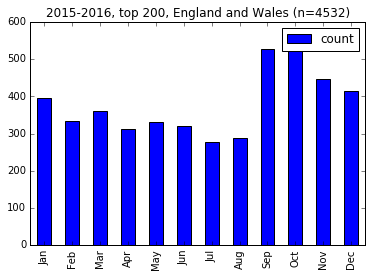

In [10]:
all_current_ew = fac.get_data(sex=None,
                              event_group=None, 
                              years=[2016, 2015], 
                              areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                              max_rank=200)
ra.plot_by_month(all_current_ew.DOB, "2015-2016, top 200, England and Wales",
                 r"C:\temp\relative_age\athletics\EW-2015-2016-top200.jpg")

In [27]:
#print ra.chi_squared(all_current_ew.DOB)
print ra.chi_squared(all_current_s.DOB)

0.0535898906042


In [12]:
groups = ra.auk.event_groups.keys()

d = {'%s' % group: 
     fac.get_data(sex=None,
                  event_group=group, 
                  years=[2016, 2015], 
                  areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                  max_rank=200).DOB for group in groups}
ra.summary_table(d.keys(), d.values(), 9).sort_values('Offset')


,Count,Offset,First half percentage,First to fourth quarter ratio
Throws,1142,-26.51,61.56,1.83
Sprints,1375,-26.30,60.36,1.88
Jumps,1284,-24.67,60.44,1.85
Distance,1185,-12.68,54.68,1.49


In [13]:
sexes = ['M', 'W']

d = {'%s' % sex: 
     fac.get_data(sex=sex,
                  event_group=None, 
                  years=[2016, 2015], 
                  areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                  max_rank=200).DOB for sex in sexes}
ra.summary_table(d.keys(), d.values(), 9).sort_values('Offset')


,Count,Offset,First half percentage,First to fourth quarter ratio
M,2395,-24.40,59.50,1.84
W,2137,-20.46,58.73,1.67


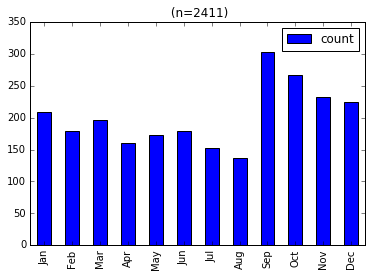

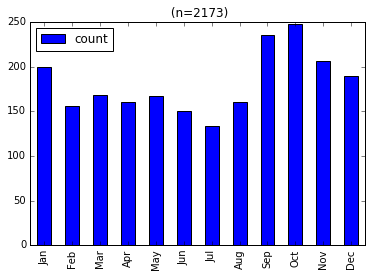

In [47]:
ra.plot_by_month(d['M'])
ra.plot_by_month(d['W'])

In [24]:
groups = ra.auk.event_groups.keys() + [None]

def f(a, g):
    return fac.get_data(sex=None,
                        age_group=a,
                        event_group=g, 
                        years=[2016, 2015], 
                        areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                        max_rank=200).DOB

ages = [ra.auk.AgeGroup.U13, ra.auk.AgeGroup.U15, ra.auk.AgeGroup.U17, ra.auk.AgeGroup.U20]

d = [[ra.average_offset(f(age, group), 9) for group in groups] for age in ages]
df = pd.DataFrame(d, columns=ra.auk.event_groups.keys()+['All'], index=ages).round(1)
df

,Sprints,Distance,Jumps,Throws,All
U13,-70.3,-44.0,-62.1,-60.6,-56.9
U15,-50.1,-29.0,-40.1,-42.8,-39.4
U17,-39.7,-18.8,-43.4,-37.3,-33.2
U20,-20.5,-4.6,-17.7,-17.8,-15.3


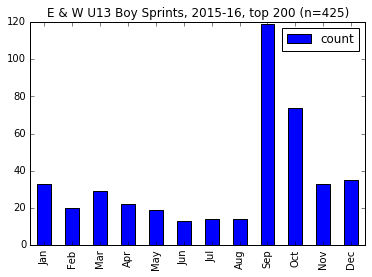

In [24]:
u13_sprint = fac.get_data(sex='M',
                    age_group=ra.auk.AgeGroup.U13,
                    event_group='Sprints', 
                    years=[2016, 2015], 
                    areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                    max_rank=200).DOB
ra.plot_by_month(u13_sprint, "E & W U13 Boy Sprints, 2015-16, top 200", 
                r"C:\temp\relative_age\athletics\EW-U13-boy-Sprints-2015-16-top200.jpg")

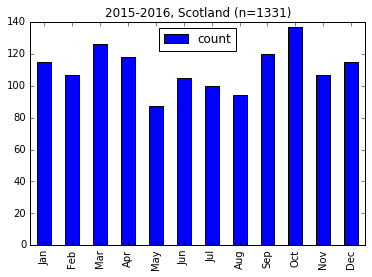

In [12]:
all_current_s = fac.get_data(sex=None,
                              event_group=None, 
                              years=[2016, 2015], 
                              areas=[ra.auk.Area.Scotland], 
                              max_rank=200)
ra.plot_by_month(all_current_s.DOB, "2015-2016, Scotland",
                r"C:\temp\relative_age\athletics\S-2015-16-top200.jpg")

In [25]:
groups = ra.auk.event_groups.keys() + [None]

def f(a, g):
    return fac.get_data(sex=None,
                        age_group=a,
                        event_group=g, 
                        years=[2016, 2015], 
                        areas=[ra.auk.Area.Scotland], 
                        max_rank=200).DOB

ages = [ra.auk.AgeGroup.U13, ra.auk.AgeGroup.U15, ra.auk.AgeGroup.U17, ra.auk.AgeGroup.U20]

d = [[ra.average_offset(f(age, group), 9) for group in groups] for age in ages]
df = pd.DataFrame(d, columns=ra.auk.event_groups.keys() + ['All'], index=ages).round(1)
df

,Sprints,Distance,Jumps,Throws,All
U13,-47.5,-44.7,-41.5,-68.7,-40.1
U15,-25.6,-19.6,-22.8,-38.9,-24.2
U17,-10.7,-7.5,-17.2,-22.1,-12.4
U20,-0.6,1.3,14.1,-1.8,2.2


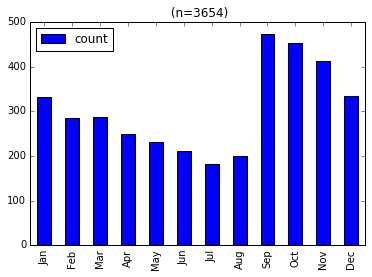

In [35]:
d = fac.get_data(sex=None,
                        age_group=ra.auk.AgeGroup.U17,
                        event_group=None, 
                        years=[2016, 2015], 
                        areas=[ra.auk.Area.Scotland], 
                        max_rank=200).DOB
ra.plot_by_month(d, "Scotland U17 2015-16", r"C:\temp\relative_age\athletics\S-U17-2015-16.jpg")
d.sort_values()

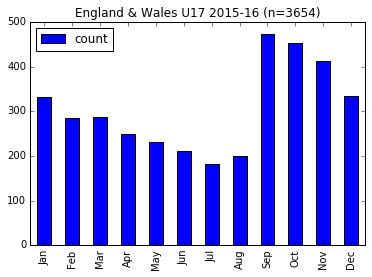

In [36]:
d = fac.get_data(sex=None,
                        age_group=ra.auk.AgeGroup.U17,
                        event_group=None, 
                        years=[2016, 2015], 
                        areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                        max_rank=200).DOB
ra.plot_by_month(d, "England & Wales U17 2015-16", r"C:\temp\relative_age\athletics\EW-U17-2015-16.jpg")


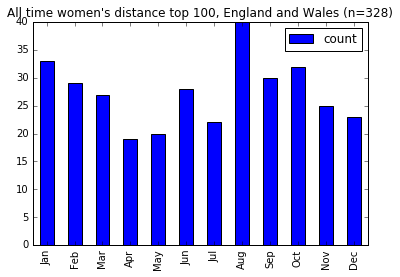

In [42]:
d = fac.get_data(sex='W',
                           event_group='Distance', 
                           years=None, 
                           areas=[ra.auk.Area.England, ra.auk.Area.Wales], 
                           max_rank=100).DOB
ra.plot_by_month(d, "All time women's distance top 100, England and Wales",
                 r"C:\temp\relative_age\athletics\EW-womens-distance.jpg")